In [150]:
#@title Python imports
# A bit of imports
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline
sns.set(color_codes=True)
from sklearn import linear_model
from matplotlib.colors import LinearSegmentedColormap
from matplotlib_scalebar.scalebar import ScaleBar
import statsmodels.api as statm

import libpysal as ps
from mgwr.gwr import GWR
from mgwr.gwr import MGWR
from mgwr.sel_bw import Sel_BW
from spglm.family import Gaussian, Binomial, Poisson
import multiprocessing as mp
pool = mp.Pool()
import io

In [151]:
census = pd.read_csv("MGWR_session_results.csv")

In [152]:
census.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'Unnamed: 0.1.1.1.1', 'ind', 'x_coor', 'y_coor', 'y', 'ols_residual',
       'mgwr_yhat', 'mgwr_residual', 'localR2', 'beta_Intercept',
       'beta_avg_age', 'beta_avg_basement', 'beta_avg_sqft',
       'beta_avg_water_dist', 'beta_avg_unemp', 'beta_avg_tech',
       'beta_avg_index', 'se_Intercept', 'se_avg_age', 'se_avg_basement',
       'se_avg_sqft', 'se_avg_water_dist', 'se_avg_unemp', 'se_avg_tech',
       'se_avg_index', 't_Intercept', 't_avg_age', 't_avg_basement',
       't_avg_sqft', 't_avg_water_dist', 't_avg_unemp', 't_avg_tech',
       't_avg_index', 'p_Intercept', 'p_avg_age', 'p_avg_basement',
       'p_avg_sqft', 'p_avg_water_dist', 'p_avg_unemp', 'p_avg_tech',
       'p_avg_index', 'sumW_Intercept', 'sumW_avg_age', 'sumW_avg_basement',
       'sumW_avg_sqft', 'sumW_avg_water_dist', 'sumW_avg_unemp',
       'sumW_avg_tech', 'sumW_avg_index', 'w_43', 'w_164', 'w_226', 'w_81',
       'w_354

In [153]:
b_cols = ['beta_Intercept', 'beta_avg_age','beta_avg_water_dist', 'beta_avg_sqft', 'beta_avg_basement','beta_avg_index', 'beta_avg_unemp', 'beta_avg_tech']
bt_cols = ['bt_constant','bt_age','bt_water_dist','bt_sqft','bt_round_basement','bt_index','bt_unemp','bt_tech']
t_cols = ['t_Intercept','t_avg_age', 't_avg_water_dist', 't_avg_sqft', 't_avg_basement','t_avg_index', 't_avg_unemp', 't_avg_tech']
t_crit = [2.92,2.94,2.67,2.99,3.01,2.14,2.20,2.41]

In [154]:
for i in range(8):
    census.loc[census[t_cols[i]] >=t_crit[i], bt_cols[i]] = census[b_cols[i]]
    census.loc[census[t_cols[i]] <=-t_crit[i], bt_cols[i]] = census[b_cols[i]]

In [155]:
tr = pd.read_csv("census_tracts/census_tracts.csv")

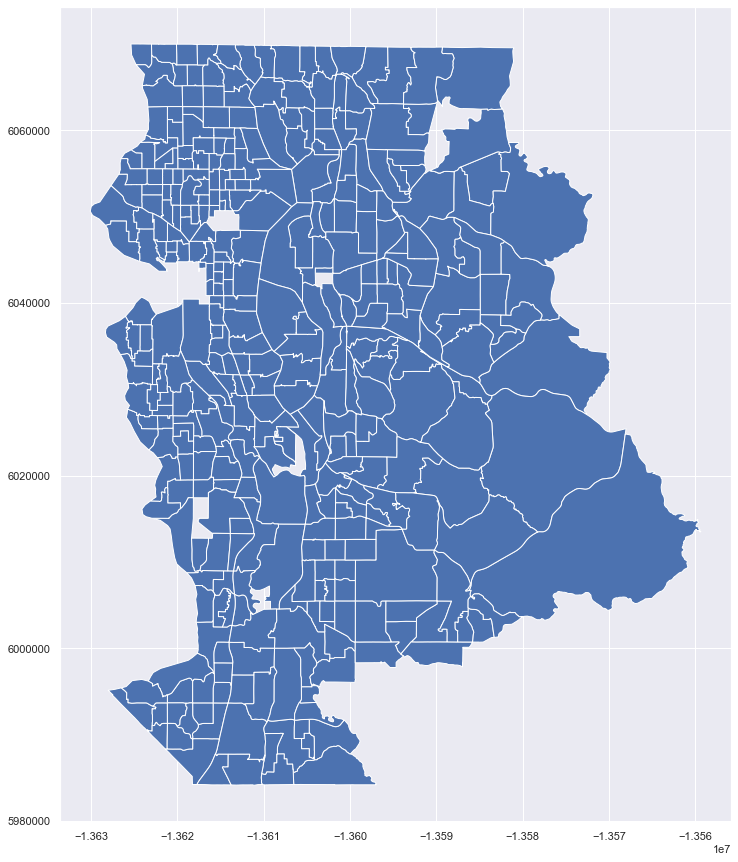

In [156]:
c='census_tracts/census_tracts.shp'
crs = {'EPSG':'4326'}
geo = gpd.read_file(c,crs=crs)[['geometry','objectid']]
fig,ax = plt.subplots(figsize=(20,15))
geo.plot(ax=ax)

In [157]:
geo.crs

{'init': 'epsg:3857'}

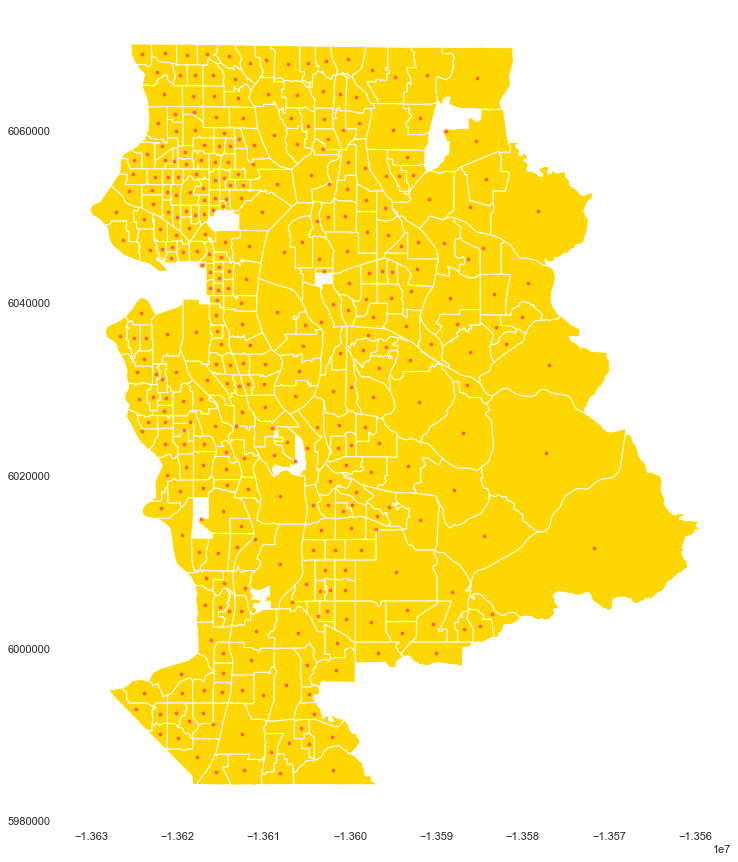

In [158]:
coords = np.array(list(zip(census['x_coor'],census['y_coor'])))
geom_points = [Point(xy) for xy in coords]
geo_df = gpd.GeoDataFrame(census,crs={'init':'epsg:4326'},geometry=geom_points)
geo_df = geo_df.rename(columns={'OBJECTID':'index'})
geo_df = geo_df.to_crs(epsg=3857)
final_geo = gpd.sjoin(geo, geo_df, how='inner',op='contains',lsuffix='left',rsuffix='right')

fig,ax = plt.subplots(figsize=(20,15))
ax.set_facecolor('white')
final_geo.plot(ax=ax, color='gold')
geo_df.plot(ax=ax, markersize=8,alpha=1,color='tomato',marker="o")

In [159]:
import scipy as sp
import shapefile as shp

import matplotlib as mpl
import matplotlib.pyplot as plt
class MidpointNormalize(mpl.colors.Normalize):
    def __init__(self, vmin, vmax, midpoint=0, clip=False):
        self.midpoint = midpoint
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        normalized_min = max(0, 1 / 2 * (1 - abs((self.midpoint - self.vmin) / (self.midpoint - self.vmax))))
        normalized_max = min(1, 1 / 2 * (1 + abs((self.vmax - self.midpoint) / (self.midpoint - self.vmin))))
        normalized_mid = 0.5
        x, y = [self.vmin, self.midpoint, self.vmax], [normalized_min, normalized_mid, normalized_max]
        return sp.ma.masked_array(sp.interp(value, x, y))

In [160]:
label = gpd.read_file("more_labels_new/more_labels_new.shp")

In [161]:
label=label.to_crs(epsg=3857)
label=label.drop(label.index[3])
label=label.reset_index()
label=label.drop(label.index[5])
label=label.reset_index()
label

,level_0,index,FID_,Field1,latitude,longitude,names,geometry
0,0,0,0,0,47.600000,-122.3000,Seattle,POINT (-13614373.72401736 6040565.208625006)
1,1,1,1,1,47.610100,-122.2015,Bellevue,POINT (-13603408.75417422 6042232.762266758)
2,2,2,2,2,47.674000,-122.1215,Redmond,POINT (-13594503.19491076 6052790.400185969)
3,3,4,4,4,47.627740,-122.2420,Bill Gates' House,POINT (-13607917.19355135 6045145.975053936)
4,4,5,5,5,47.655548,-122.2950,University of Washington,POINT (-13613817.12656339 6049740.411229585)
5,6,7,7,7,47.488300,-121.9467,Tiger Mountain State Forest,POINT (-13575044.54792009 6022144.481821851)
6,7,8,8,8,47.479700,-122.2079,Renton,POINT (-13604121.1989153 6020727.859753064)
7,8,9,9,9,47.380900,-122.2348,Kent,POINT (-13607115.69321764 6004469.784188417)
8,9,10,10,10,47.322300,-122.3126,Federal Way,POINT (-13615776.34960135 5994841.227999952)
9,10,11,11,11,47.680000,-122.2290,Lake Washington,POINT (-13606470.04017103 6053782.391355693)


In [176]:
def mapp(col,name,color,filename,normal=False):  
    vmi=min(col[name])
    vma=max(col[name])
    figsize=(14,10)
    colors = 10
    norm = MidpointNormalize(vmin=vmi, vmax=vma, midpoint=0)
    colors = 6
    fig, ax = plt.subplots(1, figsize=(14, 14))

    if normal==True:
        col.plot(column=name, ax=ax,cmap=color,figsize=figsize,k=colors, linewidth=0.5,norm=norm)
    else:
        col.plot(column=name, ax=ax,cmap=color,figsize=figsize,k=colors, linewidth=0.5)

    ax.axis("off")

    Scalebar = ScaleBar(100000,location='lower left') # 1 pixel = 0.2 meter
    scatter = ax.collections[-1]

    plt.colorbar(scatter, ax=ax, extend='min',orientation='horizontal',fraction=0.046, pad=0.04)
    col.boundary.plot(ax=ax,color='grey',alpha=0.2)

    texts = []
    for x, y, lab in zip(label.geometry.x, label.geometry.y, label["names"]):
      texts.append(plt.text(x-1500, y-700, lab, fontsize = 8,horizontalalignment='left',verticalalignment='baseline',bbox=dict(facecolor='white', alpha=0.7,linewidth=0.0)))
    label.plot(ax=ax,alpha=1,color='black',linewidth=0.4)
    

    plt.savefig("../images/"+filename)

In [169]:
final_geo.columns

Index(['geometry', 'objectid', 'index_right', 'Unnamed: 0', 'Unnamed: 0.1',
       'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'Unnamed: 0.1.1.1.1', 'ind',
       'x_coor', 'y_coor', 'y', 'ols_residual', 'mgwr_yhat', 'mgwr_residual',
       'localR2', 'beta_Intercept', 'beta_avg_age', 'beta_avg_basement',
       'beta_avg_sqft', 'beta_avg_water_dist', 'beta_avg_unemp',
       'beta_avg_tech', 'beta_avg_index', 'se_Intercept', 'se_avg_age',
       'se_avg_basement', 'se_avg_sqft', 'se_avg_water_dist', 'se_avg_unemp',
       'se_avg_tech', 'se_avg_index', 't_Intercept', 't_avg_age',
       't_avg_basement', 't_avg_sqft', 't_avg_water_dist', 't_avg_unemp',
       't_avg_tech', 't_avg_index', 'p_Intercept', 'p_avg_age',
       'p_avg_basement', 'p_avg_sqft', 'p_avg_water_dist', 'p_avg_unemp',
       'p_avg_tech', 'p_avg_index', 'sumW_Intercept', 'sumW_avg_age',
       'sumW_avg_basement', 'sumW_avg_sqft', 'sumW_avg_water_dist',
       'sumW_avg_unemp', 'sumW_avg_tech', 'sumW_avg_index', 'w_43', 

In [188]:
final_geo['btn_water']=final_geo['bt_water_dist'].fillna(0.0)

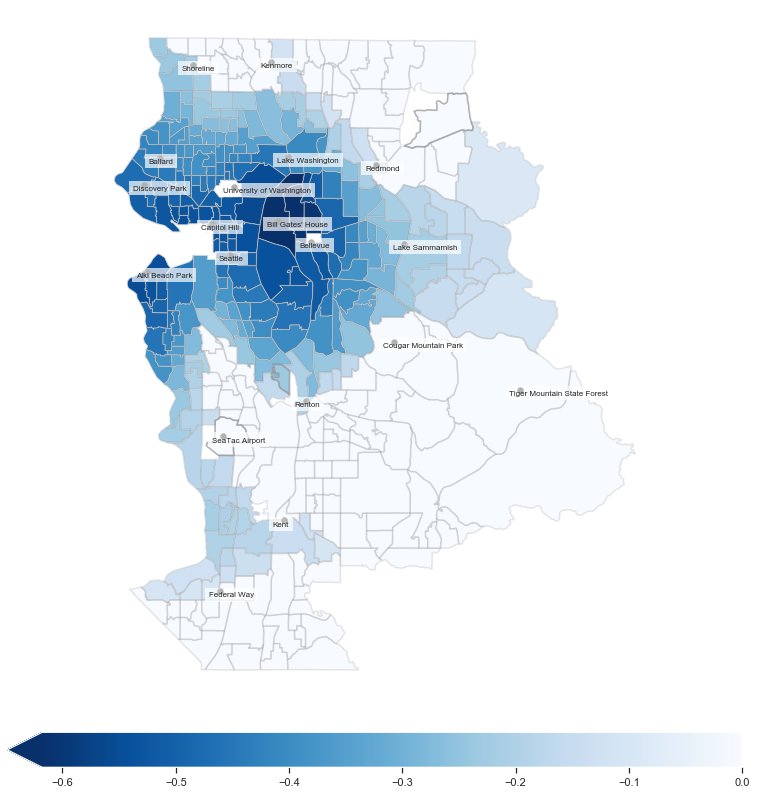

In [190]:
mapp(col=final_geo,name='btn_water',color='Blues_r',filename="trial",normal=False)

In [183]:
final_geo['bt_age']

0           NaN
1           NaN
2      0.099947
3           NaN
4           NaN
         ...   
352         NaN
353         NaN
354         NaN
355         NaN
356         NaN
Name: bt_age, Length: 363, dtype: float64